## Analise de medidas de variabilidade e medidas resumo

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [43]:
df = pd.read_excel("base_musical.xlsx")
df = df.drop(columns='Unnamed: 0')
df = df.rename(columns={'tempo': 'BPM'})

In [44]:
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
variancia = df.var(numeric_only=True)
dp = df.std(numeric_only=True)
coeficiente_variacao = dp / media

dfEstatisticas = df.describe()
dfEstatisticas.loc['mediana'] = mediana
dfEstatisticas.loc['variancia'] = variancia
dfEstatisticas.loc['coeficiente_variacao'] = dfEstatisticas.loc['std'] / dfEstatisticas.loc['mean']

In [45]:
dfEstatisticas

,dancabilidade,energia,chave,volume,presenca_palavras,acustica,instrumentalidade,ao_vivo,positividade,BPM,duracao_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,0.700620,0.685060,4.960000,-5.799960,0.096226,0.220353,0.001327,0.189840,0.547900,127.743580,1.945456e+05
std,0.139967,0.134677,4.060562,2.025294,0.095957,0.239561,0.005335,0.138250,0.233509,29.259773,3.969129e+04
min,0.346000,0.317000,0.000000,-13.123000,0.030900,0.000235,0.000000,0.052600,0.139000,79.928000,9.739300e+04
25%,0.614250,0.599750,1.000000,-7.044750,0.043025,0.041100,0.000000,0.091650,0.374000,108.522500,1.712915e+05
50%,0.704000,0.697000,5.000000,-5.538500,0.053600,0.109000,0.000004,0.124000,0.527500,124.516500,1.894510e+05
75%,0.800250,0.762000,9.000000,-4.668250,0.093450,0.298000,0.000060,0.254750,0.722000,138.402750,2.253130e+05
max,0.951000,0.965000,11.000000,-1.215000,0.448000,0.891000,0.033000,0.658000,0.972000,202.466000,2.989330e+05
mediana,0.704000,0.697000,5.000000,-5.538500,0.053600,0.109000,0.000004,0.124000,0.527500,124.516500,1.894510e+05
variancia,0.019591,0.018138,16.488163,4.101814,0.009208,0.057390,0.000028,0.019113,0.054527,856.134328,1.575398e+09


## Gráficos

array([[<AxesSubplot:title={'center':'dancabilidade'}>,
        <AxesSubplot:title={'center':'energia'}>,
        <AxesSubplot:title={'center':'chave'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'presenca_palavras'}>,
        <AxesSubplot:title={'center':'acustica'}>],
       [<AxesSubplot:title={'center':'instrumentalidade'}>,
        <AxesSubplot:title={'center':'ao_vivo'}>,
        <AxesSubplot:title={'center':'positividade'}>],
       [<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'duracao_ms'}>, <AxesSubplot:>]],
      dtype=object)

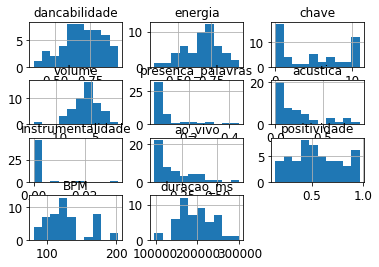

In [46]:
df.hist() 

<AxesSubplot:>

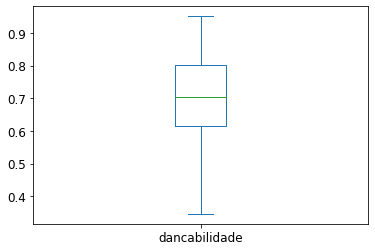

In [47]:
df['dancabilidade'].plot(kind = 'box')

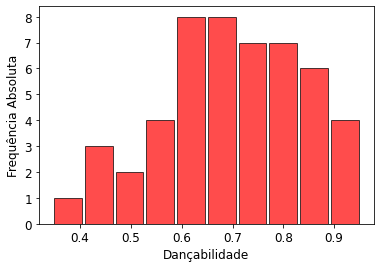

In [53]:
plt.hist(df['dancabilidade'], rwidth=0.9, color='red', alpha=0.7, edgecolor='black', )
plt.xlabel('Dançabilidade')
plt.ylabel('Frequência Absoluta')
# plt.subplots(figsize =(10, 7))
plt.show()

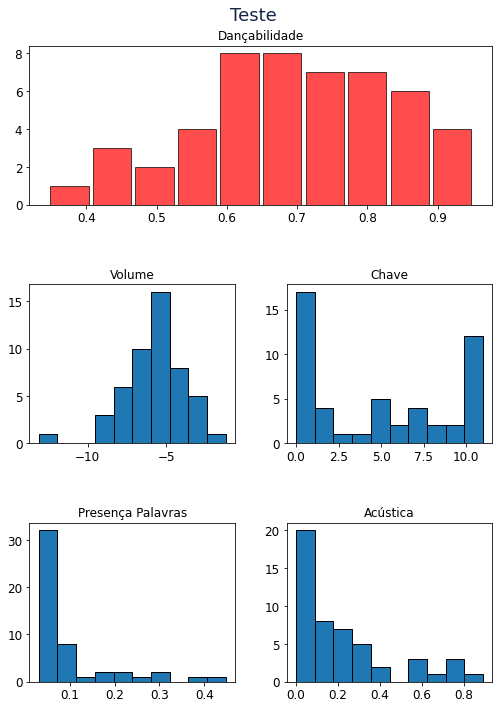

In [54]:
fig = plt.gcf()
fig.set_size_inches(8.3,11.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12
fig.text(
    x=0.5,
    y=0.91,
    s='Teste',
    fontsize = 18,
    horizontalalignment='center',
    color='#152747')
gs = gridspec.GridSpec(3, 2, hspace=0.5,wspace=0.25)
#SIN
plt.subplot(gs[0, :])
plt.hist(df['dancabilidade'], rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.title("Dançabilidade")
# plt.ylabel('Carga(GW)')
# plt.grid(True)
# plt.legend(loc='upper center', fontsize=11)

# plt.annotate(
#     'teste',
#     xy=(mes,new_sin_load),
#     color='#143c5a',
#     fontsize = 10,
#     xytext=(0,-20),
#     textcoords='offset points'
# )
# for i, row in last_sin_load['antiga'].iterrows():
#     plt.annotate(
#         str(row['CARGA ANTIGA']),
#         xy=(row['DATA'],row['CARGA ANTIGA']),
#         color='#2fb3c3',
#         fontsize = 10,
#         xytext=(0,10),
#         textcoords='offset points'
#     )



plt.subplot(gs[1,0])
plt.hist(df['volume'], edgecolor='black')
plt.title('Volume')

plt.subplot(gs[1,1])
plt.hist(df['chave'], edgecolor='black')
plt.title('Chave')


plt.subplot(gs[2,0])
plt.hist(df['presenca_palavras'], edgecolor='black')
plt.title('Presença Palavras')

plt.subplot(gs[2,1])
plt.hist(df['acustica'], edgecolor='black')
plt.title('Acústica')



# plt.savefig('graficos.png', format='png')
plt.show()




In [50]:
import numpy as np
p25, p50, p75 = np.percentile(df['dancabilidade'], [25, 50, 75])

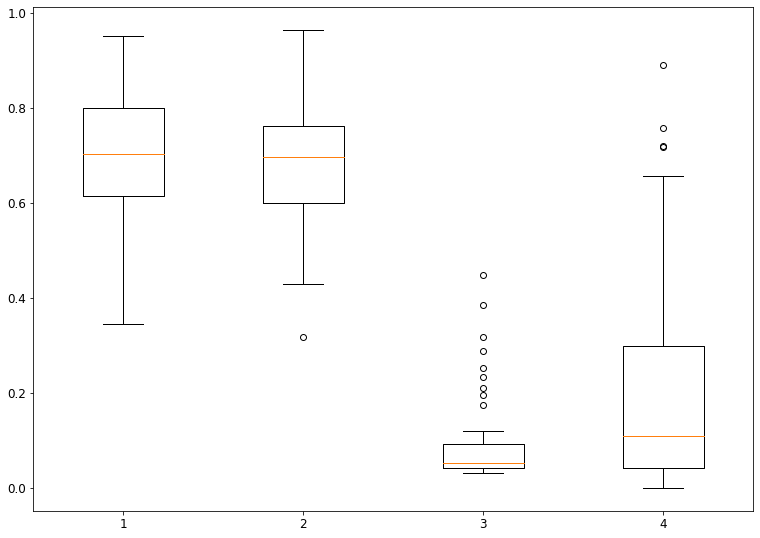

In [52]:
# Creating dataset
data = [df['dancabilidade'], df['energia'], df['presenca_palavras'], df['acustica']]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()